![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+ML%2FSolution+Prototypes%2Fdocument-processing&file=2-document-extraction.ipynb)
<!--- header table --->
<table align="left">
<tr>
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/2-document-extraction.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/2-document-extraction.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520ML%2FSolution%2520Prototypes%2Fdocument-processing%2F2-document-extraction.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/2-document-extraction.ipynb">
      <img width="32px" src="https://www.gstatic.com/images/branding/gcpiconscolors/bigquery/v1/32px.svg" alt="BigQuery logo">
      <br>Open in<br>BigQuery Studio
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20ML/Solution%20Prototypes/document-processing/2-document-extraction.ipynb">
      <img width="32px" src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</tr>
<tr>
  <td colspan="5" style="text-align: right">
    <b>Share This On: </b> 
    <a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/statmike/vertex-ai-mlops/blob/main/Applied+ML%2FSolution+Prototypes%2Fdocument-processing/2-document-extraction.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="Linkedin Logo" width="20px"></a> 
    <a href="https://reddit.com/submit?url=https%3A//github.com/statmike/vertex-ai-mlops/blob/main/Applied+ML%2FSolution+Prototypes%2Fdocument-processing/2-document-extraction.ipynb"><img src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit Logo" width="20px"></a> 
    <a href="https://bsky.app/intent/compose?text=https%3A//github.com/statmike/vertex-ai-mlops/blob/main/Applied+ML%2FSolution+Prototypes%2Fdocument-processing/2-document-extraction.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="BlueSky Logo" width="20px"></a> 
    <a href="https://twitter.com/intent/tweet?url=https%3A//github.com/statmike/vertex-ai-mlops/blob/main/Applied+ML%2FSolution+Prototypes%2Fdocument-processing/2-document-extraction.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X (Twitter) Logo" width="20px"></a> 
  </td>
</tr>
<tr>
  <td colspan="5" style="text-align: right">
    <b>Connect With Author On: </b> 
    <a href="https://www.linkedin.com/in/statmike"><img src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="Linkedin Logo" width="20px"></a>
    <a href="https://www.github.com/statmike"><img src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub Logo" width="20px"></a> 
    <a href="https://www.youtube.com/@statmike-channel"><img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/YouTube_full-color_icon_%282024%29.svg" alt="YouTube Logo" width="20px"></a>
    <a href="https://bsky.app/profile/statmike.bsky.social"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="BlueSky Logo" width="20px"></a> 
    <a href="https://x.com/statmike"><img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X (Twitter) Logo" width="20px"></a>
  </td>
</tr>
</table>

# Document Extraction With Document AI Customer Data Extractors

> This workflow is part of a series of workflows for the solution prototype: [Document Processing With Generative AI: Parse, Extract, Validate Authenticity, and More](./readme.md)

Now that we have [documents](./0-generate-documents.ipynb) and a [customer data extractor built with Document AI](./1-custom-extraction.ipynb) it is time to build a system to managed the documents and the extracted results.  In a real workflow we have a history of many documents as well as a feed of new documents arriving.  This workflow will create a system to manage the information flow.  This approach can be augmented with more automations for handling documents as they arrive and these considerations will be covered at the end of this workflow.

We will need documents for multiple services as they arrive and they will need to be retained for some duration to be used for comparison as new documents arrive in the future.  This workflow creates the core of the needed system:

- Save documents to [Google Cloud Storage (GCS)](https://cloud.google.com/storage/docs)
- Use The Custom Data Extractor:
  - How to use Document AI Parsers for **Online Processing**
  - How to use Document AI Parser for **Batch Processing**
  - How to Use Document AI Parsers **directly inside BigQuery**
- Setup [Google Cloud BigQuery](https://cloud.google.com/bigquery/docs)
  - A new dataset to hold our work
  - A new object table to manage and analyze documents stored in GCS

## Setup

Note that this notebook expects to use a local virtual environment with the `./requirements.txt` installed.  

A potential workaround if using this notebook standalone is running:

>```python
>pip install -r requirements.txt
>```

And then restart the kernel.

In [1]:
# package imports for this work
import os, subprocess, io, re

import IPython.display
import fitz # PyMuPDF

from google.cloud import documentai
from google.cloud import storage
from google.cloud import bigquery
import bigframes.pandas as bpd

In [2]:
# what project are we working in?
PROJECT_ID = subprocess.run(['gcloud', 'config', 'get-value', 'project'], capture_output=True, text=True, check=True).stdout.strip()
PROJECT_ID

'statmike-mlops-349915'

In [3]:
LOCATION = 'us-central1'

SERIES = 'applied-ml-solution-prototypes'
EXPERIMENT = 'document-processing'
GCS_BUCKET = PROJECT_ID # bucket has same name as project here

In [4]:
# setup google cloud storage client
gcs = storage.Client(project = PROJECT_ID)
bucket = gcs.bucket(GCS_BUCKET)

# setup document AI Client
docai_client = documentai.DocumentProcessorServiceClient(
    client_options = dict(api_endpoint = f"{LOCATION[0:2]}-documentai.googleapis.com")
)

# setup google cloud bigquery client
bq = bigquery.Client(project = PROJECT_ID)

# load the bigquery magics for jupyter with:
%load_ext bigquery_magics

---
## Store Documents In GCS

We need to save the documents currently stored locally in [./resources/documents](./resources/documents) in a GCS bucket.  There are several approachs to this:
- Use a Command line interface (CLI)
  - [gcloud CLI](https://cloud.google.com/sdk/gcloud), specifically the [gcloud storage](https://cloud.google.com/storage/docs/discover-object-storage-gcloud) command group
    - References:
      - Full [gcloud Reference](https://cloud.google.com/sdk/gcloud/reference)
      - Specific [gcloud storage Reference](https://cloud.google.com/sdk/gcloud/reference/storage)
- Use a [Cloud Storage client library](https://cloud.google.com/storage/docs/reference/libraries) in the language of choice

Objects in cloud storage have URI's like: `gs://bucket-name/path/to/the/filename.ext`.  This is three parts:
- `bucket-name`
- a prefix or path for a object like `/path/to/the`
- object name like 'filename.ext'


### Copy Documents To GCS with `gcloud storage`

The first step is making a full copy of the local document in a storage bucket.

In [5]:
# local folder name
LOCAL_PATH = './resources/documents'
print(LOCAL_PATH)

./resources/documents


In [6]:
# list contents of LCOAL_PATH
!ls $LOCAL_PATH

vendor_0   vendor_11  vendor_14  vendor_4  vendor_7
vendor_1   vendor_12  vendor_2	 vendor_5  vendor_8
vendor_10  vendor_13  vendor_3	 vendor_6  vendor_9


In [7]:
# bucket name - already exists here
print(GCS_BUCKET)

statmike-mlops-349915


In [8]:
# path - assemble from variables create above
GCS_PATH = f"{SERIES}/{EXPERIMENT}"
print(GCS_PATH)

applied-ml-solution-prototypes/document-processing


In [11]:
# Construct the gcloud command
gcloud_command = [
    "gcloud",
    "storage",
    "cp",
    "-r",  # Recursive copy
    LOCAL_PATH,
    f"gs://{GCS_BUCKET}/{GCS_PATH}",
]
print(' '.join(gcloud_command))

gcloud storage cp -r ./resources/documents gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing


In [ ]:
# run the gcloud storage cp command:
cp_result = subprocess.run(gcloud_command, capture_output=True, text=True, check=True)
cp_result.stdout

''

In [9]:
# list the contents at the path in GCS
subprocess.run(['gcloud', 'storage', 'ls', f"gs://{GCS_BUCKET}/{GCS_PATH}"], capture_output=True, text=True, check=True).stdout.strip().split('\n')

['gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/documentai/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_0/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_1/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_10/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_11/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_12/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_13/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_14/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_2/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_3/',
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-proc

The files can also be viewed directly in the console like:

<img src='./resources/images/extraction/screen_1.png'></img>

### Review GCS Storage With Client Library (Python)

Use the Python Client Libary to review the contents of the GCS storage and download a file.

In [10]:
# list all the objects at the new path:
[b.name for b in bucket.list_blobs(prefix = GCS_PATH)][0:10]

['applied-ml-solution-prototypes/document-processing/documentai/batch_processing/2579227481490316167/0/vendor_0_invoice_0-0.json',
 'applied-ml-solution-prototypes/document-processing/vendor_0/data/invoices.jsonl',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_0.pdf',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_0.png',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_1.pdf',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_1.png',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_10.pdf',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_10.png',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_11.pdf',
 'applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices

In [11]:
blob = bucket.blob(f'{GCS_PATH}/vendor_0/invoices/vendor_0_invoice_0.pdf')
pdf_bytes = blob.download_as_bytes()

In [12]:
document = fitz.open('pdf', pdf_bytes)

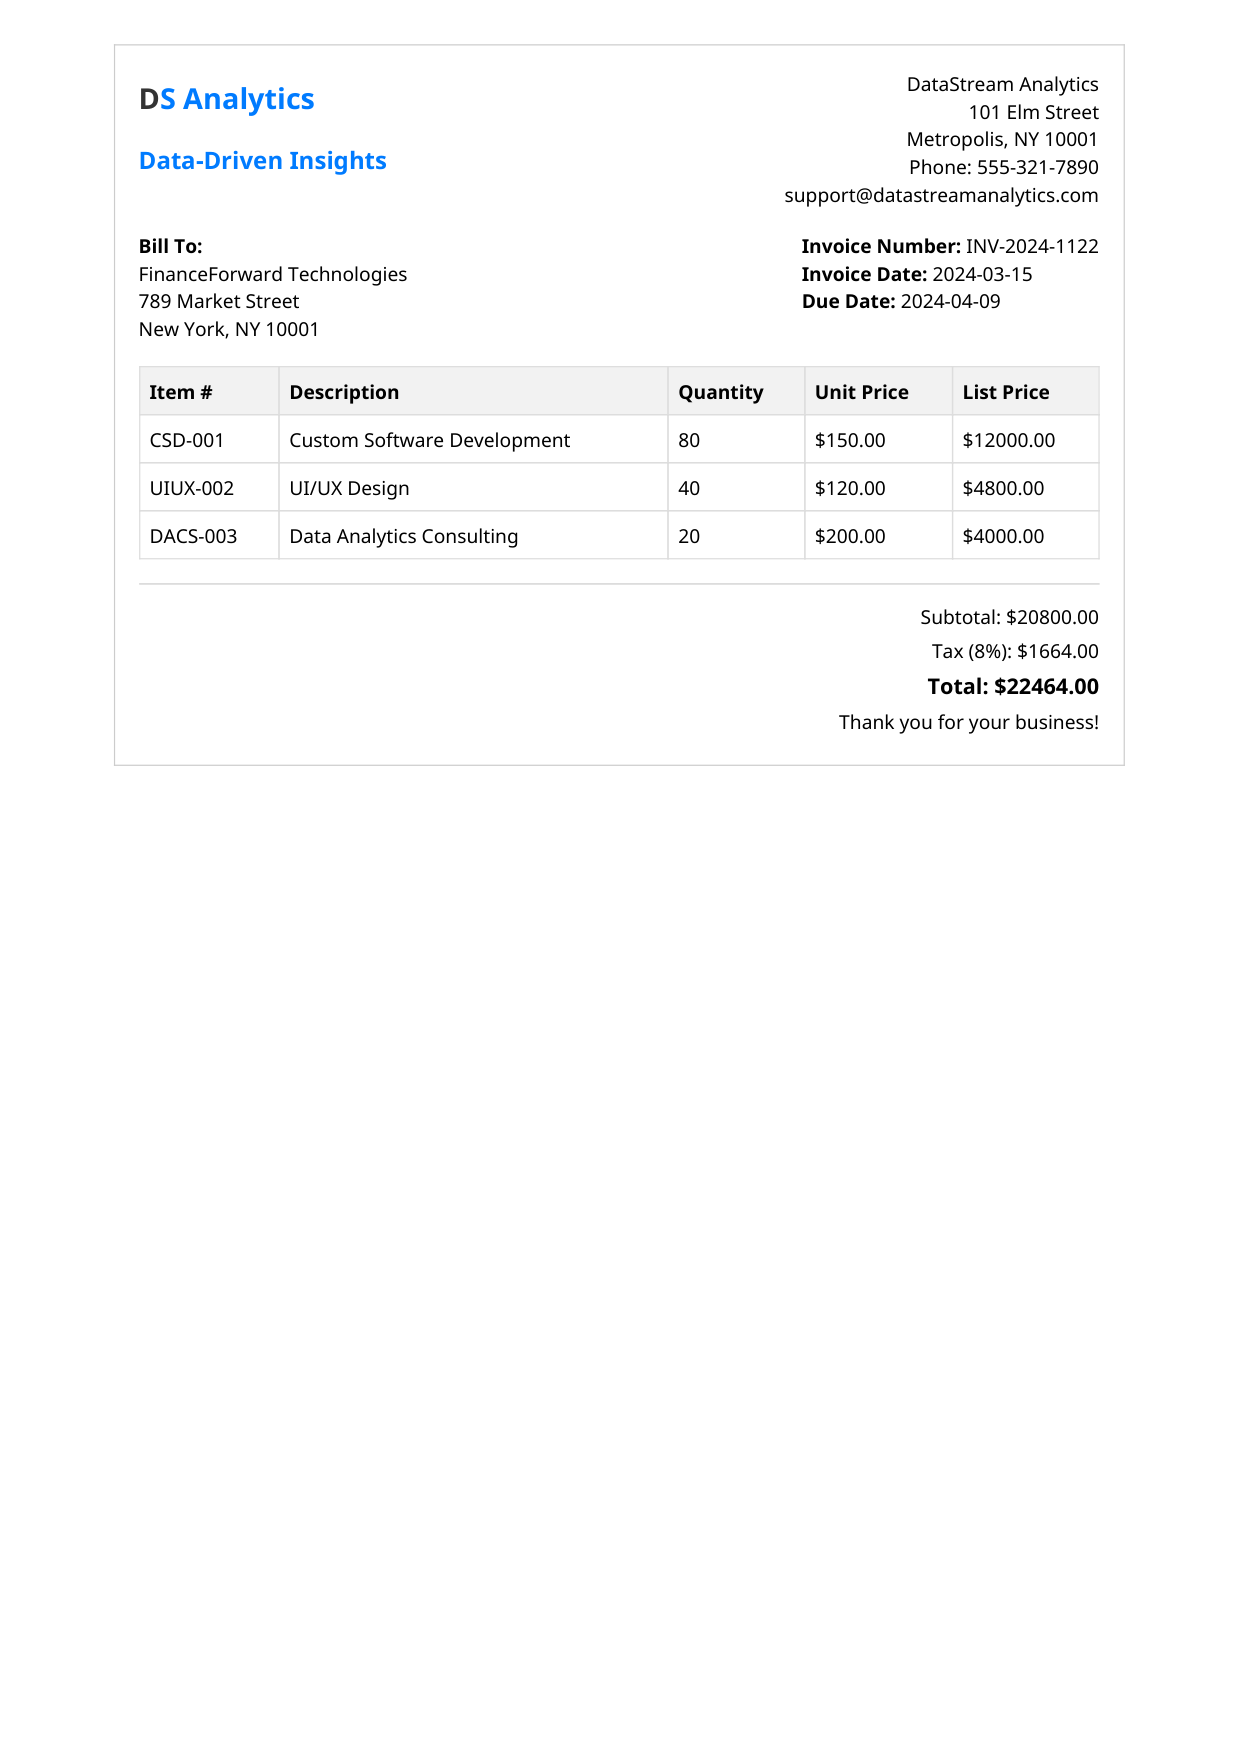

In [13]:
page = document.load_page(0)
pix = page.get_pixmap(dpi=150)
image = pix.tobytes('png')
IPython.display.display(IPython.display.Image(data = image, width = 700))

### Add Object Metadata

The path to the objects in GCS actually has two important pieces of metadata.  The file/object at this path:

`applied-ml-solution-prototypes/document-processing/vendor_0/invoices/vendor_0_invoice_0.pdf`

Is actually better tagged with metadata like:
```
vendor:vendor_0
file_type: invoices
```

GCS allows for adding object metadata.  The code here uses the Python client for GCS to detect these objects and add this metadata.  This approach should be switch the the async client for large volumes fo files.

In [67]:
GCS_PATH

'applied-ml-solution-prototypes/document-processing'

In [68]:
for b in bucket.list_blobs(prefix = GCS_PATH):
    # get the end of the path with object
    path = b.name[len(GCS_PATH):]
    path_parts = path.split('/')
    metadata = dict(vendor = path_parts[1], file_category = path_parts[2])
    # update the blob
    b.reload()
    existing_metadata = b.metadata or {}
    existing_metadata.update(metadata)
    b.metadata = existing_metadata
    b.patch()

    print(f"Updated blob: {b.name}")

Updated blob: applied-ml-solution-prototypes/document-processing/documentai/batch_processing/2579227481490316167/0/vendor_0_invoice_0-0.json
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/data/invoices.jsonl
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_0.pdf
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_0.png
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_1.pdf
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_1.png
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_10.pdf
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_invoice_10.png
Updated blob: applied-ml-solution-prototypes/document-processing/vendor_0/fake_invoices/vendor_0_

In [69]:
b.name, b.metadata

('applied-ml-solution-prototypes/document-processing/vendor_9/template/template.png',
 {'vendor': 'vendor_9', 'file_category': 'template'})

---
## Document AI Custom Data Extractor With Clients

In the previous workflow in this series ([1-custom-extraction.ipynb](./1-custom-extraction.ipynb)) we created multiple Custom Data Extractor types with Document AI.  These can be used with the [DocAI Clients](https://cloud.google.com/document-ai/docs/reference) (Python here) to directly process documents as inline bytes or from GCS storage.

There are two modes of processing file(s) in GCS the client:
- Online
- Batch

Note that there are [limits based on this choice](https://cloud.google.com/document-ai/docs/processors-list#processor_cde):
- Online: 15 pages (30 with imageless_mode)
- Batch: 200 pages

There are also [quotas and limits for the service](https://cloud.google.com/document-ai/quotas) that limit the number of request per minute.

See many more details about working with Document AI processing, including splitting documents into multiple parts, in the accompanying seciton of this repository located here: 
  - Many examples and tips for [Working With Document AI](../../../Working%With/Document%20AI/readme.md)
  - Document AI Layout Parser for [Chunking and Parsing For Generative AI Retrieval](../../../Applied%20GenAI/Chunking/readme.md) documents of all sizes and volumes

### Get The Processor

We want to retrieve the processor we named `document-processing`, actually the specific version of our custome extractor parser we named `fine-tune`.

In [14]:
for p in docai_client.list_processors(parent = f'projects/{PROJECT_ID}/locations/{LOCATION[0:2]}'):
    if p.display_name == 'document-processing':
        parser = p
        print(f"Found Processor: {parser.display_name}", f"\nDefault Version: {parser.default_processor_version}")

Found Processor: document-processing 
Default Version: projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/51cb697cf226b5fd


In [15]:
[(v.display_name, v.name) for v in docai_client.list_processor_versions(parent = parser.name)]

[('Google Release Candidate',
  'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/pretrained-foundation-model-v1.5-2025-05-05'),
 ('Google Stable',
  'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/pretrained-foundation-model-v1.4-2025-02-05'),
 ('Google Stable',
  'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/pretrained-foundation-model-v1.3-2024-08-31'),
 ('Google Stable',
  'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/pretrained-foundation-model-v1.2-2024-05-10'),
 ('Google Release Candidate',
  'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/pretrained-foundation-model-v1.1-2024-03-12'),
 ('Google Stable',
  'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/pretrained-foundation-model-v1.0-2023-08-22'),
 ('fine-tune',
  'projects/1026793852137/locations/us/processors/7f04f5f

In [16]:
fine_tune_parser = [v for v in docai_client.list_processor_versions(parent = parser.name) if v.display_name == 'fine-tune'][0]
type(fine_tune_parser), fine_tune_parser

(google.cloud.documentai_v1.types.processor.ProcessorVersion,
 name: "projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/51cb697cf226b5fd"
 display_name: "fine-tune"
 state: DEPLOYED
 create_time {
   seconds: 1745282521
   nanos: 345303000
 }
 latest_evaluation {
   operation: "projects/1026793852137/locations/us/operations/5893920522703911912"
   evaluation: "projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/51cb697cf226b5fd/evaluations/51cb697cf226be47"
   aggregate_metrics {
     precision: 0.977011502
     recall: 0.96226418
     f1_score: 0.969581723
   }
   aggregate_metrics_exact {
     precision: 0.973180056
     recall: 0.958490551
     f1_score: 0.965779424
   }
 }
 document_schema {
   display_name: "CDE Schema"
   description: "Document Schema for the CDE Processor"
   entity_types {
     name: "custom_extraction_document_type"
     base_types: "document"
     properties {
       name: "vendor_name"
       valu

### Online With Bytes

In [17]:
fine_tune_response = docai_client.process_document(
    request = documentai.ProcessRequest(
        name = fine_tune_parser.name,
        inline_document = documentai.Document(
            content = pdf_bytes,
            mime_type = 'application/pdf'
        ),
    )
)

In [32]:
for e, entity in enumerate(fine_tune_response.document.entities):
    a = entity.type_
    if entity.normalized_value:
        b = entity.normalized_value
    else:
        b = entity.mention_text.strip()
    
    print(f"--------- Entity {e} -------------:\n{a}\n{b}")
    
    if entity.properties:
        print(f"--------- Entity {e} Properties ---------:")
        for prop in entity.properties:
            if prop.normalized_value:
                c = prop.normalized_value
            else:
                c = prop.mention_text
            print(f'{prop.type_} = {c}')

--------- Entity 0 -------------:
invoice_total
text: "22464 USD"
money_value {
  currency_code: "USD"
  units: 22464
}

--------- Entity 1 -------------:
invoice_id
INV-2024-1122
--------- Entity 2 -------------:
company_name
Finance Forward Technologies
--------- Entity 3 -------------:
line_item

--------- Entity 3 Properties ---------:
item_description = Custom Software Development
item_quantity = text: "80"

item_sku = CSD-001
item_total = text: "12000 USD"
money_value {
  currency_code: "USD"
  units: 12000
}

--------- Entity 4 -------------:
line_item

--------- Entity 4 Properties ---------:
item_description = UI/UX Design
item_quantity = text: "40"

item_sku = UIUX-002
item_total = text: "4800 USD"
money_value {
  currency_code: "USD"
  units: 4800
}

--------- Entity 5 -------------:
line_item

--------- Entity 5 Properties ---------:
item_description = Data Analytics Consulting
item_quantity = text: "20"

item_sku = DACS-003
item_total = text: "4000 USD"
money_value {
  cur

### Online With GCS Files

In [34]:
bucket.name, blob.name

('statmike-mlops-349915',
 'applied-ml-solution-prototypes/document-processing/vendor_0/invoices/vendor_0_invoice_0.pdf')

In [36]:
fine_tune_response = docai_client.process_document(
    request = documentai.ProcessRequest(
        name = fine_tune_parser.name,
        gcs_document = documentai.GcsDocument(
            gcs_uri = f'gs://{bucket.name}/{blob.name}',
            mime_type = 'application/pdf'
        )
    )
)

In [37]:
for e, entity in enumerate(fine_tune_response.document.entities):
    a = entity.type_
    if entity.normalized_value:
        b = entity.normalized_value
    else:
        b = entity.mention_text.strip()
    
    print(f"--------- Entity {e} -------------:\n{a}\n{b}")
    
    if entity.properties:
        print(f"--------- Entity {e} Properties ---------:")
        for prop in entity.properties:
            if prop.normalized_value:
                c = prop.normalized_value
            else:
                c = prop.mention_text
            print(f'{prop.type_} = {c}')

--------- Entity 0 -------------:
invoice_total
text: "22464 USD"
money_value {
  currency_code: "USD"
  units: 22464
}

--------- Entity 1 -------------:
company_address
789 Market Street
New York, NY 10001
--------- Entity 2 -------------:
line_item

--------- Entity 2 Properties ---------:
item_description = Custom Software Development
item_quantity = text: "80"

item_sku = CSD-001
item_total = text: "12000 USD"
money_value {
  currency_code: "USD"
  units: 12000
}

--------- Entity 3 -------------:
line_item

--------- Entity 3 Properties ---------:
item_description = UI/UX Design
item_quantity = text: "40"

item_sku = UIUX-002
item_total = text: "4800 USD"
money_value {
  currency_code: "USD"
  units: 4800
}

--------- Entity 4 -------------:
line_item

--------- Entity 4 Properties ---------:
item_description = Data Analytics Consulting
item_quantity = text: "20"

item_sku = DACS-003
item_total = text: "4000 USD"
money_value {
  currency_code: "USD"
  units: 4000
}

--------- Ent

### Batch With GCS Files

Batch processing involves specifying the input documents with an `input_documents` parameter and the location in GCS to store the results with the `document_output_config`. 

You can specify a list of indivdual files like:

```python
input_documents = documentai.BatchDocumentsInputConfig(
    gcs_documents = documentai.GcsDocuments(
        documents = [
            documentai.GcsDocument(
                gcs_uri = 'gs://...',
                mime_type = 'application/pdf'
            ),
            # continue listing more document up to the batch processing maximum
        ]
    )
)
```

Or you can specify a prefix from which all files will be read:

```python
input_documents = documentai.BatchDocumentsInputConfig(
    gcs_prefix = documentai.GcsPrefix(
       gcs_uri_prefix = 'gs://...'
    )
)
```

In this example we will use the former and speify a single file, the same one used for the online examples:

In [39]:
batch_job = docai_client.batch_process_documents(
    request = documentai.BatchProcessRequest(
        name = fine_tune_parser.name,
        input_documents = documentai.BatchDocumentsInputConfig(
            gcs_documents = documentai.GcsDocuments(
                documents = [
                    documentai.GcsDocument(
                        gcs_uri = f"gs://{bucket.name}/{blob.name}",
                        mime_type = 'application/pdf'
                    )
                ]
            )
        ),
        document_output_config = documentai.DocumentOutputConfig(
            gcs_output_config = documentai.DocumentOutputConfig.GcsOutputConfig(
                gcs_uri = f"gs://{bucket.name}/{GCS_PATH}/documentai/batch_processing"
            )
        )
    )
)

In [52]:
print(f'Waiting on batch job to complete: {batch_job.operation.name}')

while batch_job.running():
    time.sleep(10)

batch_job.result()

print(documentai.BatchProcessMetadata(batch_job.metadata).state.name)

Waiting on batch job to complete: projects/1026793852137/locations/us/operations/2579227481490316167
SUCCEEDED


In [53]:
# list the input document and output location pairs:
for d, doc in enumerate(batch_job.metadata.individual_process_statuses):
    print(f'Document {d}:\n\t{doc.input_gcs_source}\n\t{doc.output_gcs_destination}\n')

Document 0:
	gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_0/invoices/vendor_0_invoice_0.pdf
	gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/documentai/batch_processing/2579227481490316167/0



#### Retrieve Result From GCS

In [56]:
batch_responses = []
for process in documentai.BatchProcessMetadata(batch_job.metadata).individual_process_statuses:
    matches = re.match(r"gs://(.*?)/(.*)", process.output_gcs_destination)
    output_bucket, output_prefix = matches.groups()
    output_blobs = bucket.list_blobs(prefix = output_prefix)
    for blob in output_blobs:
        response = documentai.Document.from_json(blob.download_as_bytes(), ignore_unknown_fields = True)
        batch_responses.append((blob.name.split('/')[-1], response))

In [57]:
len(batch_responses)

1

In [58]:
batch_responses[0][0]

'vendor_0_invoice_0-0.json'

In [62]:
type(batch_responses[0][1])

google.cloud.documentai_v1.types.document.Document

In [66]:
for e, entity in enumerate(batch_responses[0][1].entities):
    a = entity.type_
    if entity.normalized_value:
        b = entity.normalized_value
    else:
        b = entity.mention_text.strip()
    
    print(f"--------- Entity {e} -------------:\n{a}\n{b}")
    
    if entity.properties:
        print(f"--------- Entity {e} Properties ---------:")
        for prop in entity.properties:
            if prop.normalized_value:
                c = prop.normalized_value
            else:
                c = prop.mention_text
            print(f'{prop.type_} = {c}')

--------- Entity 0 -------------:
vendor_name
DS Analytics
--------- Entity 1 -------------:
invoice_id
INV-2024-1122
--------- Entity 2 -------------:
company_address
789 Market Street
New York, NY 10001
--------- Entity 3 -------------:
invoice_total
text: "22464 USD"
money_value {
  currency_code: "USD"
  units: 22464
}

--------- Entity 4 -------------:
company_name
Finance Forward Technologies
--------- Entity 5 -------------:
line_item

--------- Entity 5 Properties ---------:
item_description = Custom Software Development
item_quantity = text: "80"

item_sku = CSD-001
item_total = text: "12000 USD"
money_value {
  currency_code: "USD"
  units: 12000
}

--------- Entity 6 -------------:
line_item

--------- Entity 6 Properties ---------:
item_description = UI/UX Design
item_quantity = text: "40"

item_sku = UIUX-002
item_total = text: "4800 USD"
money_value {
  currency_code: "USD"
  units: 4800
}

--------- Entity 7 -------------:
line_item

--------- Entity 7 Properties -------

---
## BigQuery For Document Processing

BigQuery is the cloud scale data warehouse that bring AI to your data.  But wait, documents are unstructured, how does BigQuery work with documents?

BigQuery has [Object tables](https://cloud.google.com/bigquery/docs/object-table-introduction) which are read-only tables over unstructured data objects in Google Cloud Storage.

BigQuery has built-in connections to Document AI that make processing document via these object table as easy as a SQL function: [ML.PROCESS_DOCUMENT](https://cloud.google.com/bigquery/docs/process-document).

This section will walk through the entire setup and workflow:
- Create a new BigQuery Dataset
- Create A BigQuery Cloud Resource Connection to manage access to the storage objects and Document AI
- Create a BigQuery Object Table
- Create A BIgQuery Model that enables the Document AI Processor
- Use `ML.PROCESS_DOCUMENT` to extract all entities form all documents in a single SQL query

Follow along the official documentation here:
- [Introduction To object tables](https://cloud.google.com/bigquery/docs/object-table-introduction)
- [Create object tables](https://cloud.google.com/bigquery/docs/object-tables)
- [Process documents with the ML.PROCESS_DOCUMENT function](https://cloud.google.com/bigquery/docs/process-document)
- [The ML.PROCESS_DOCUMENT function](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-process-document)

### Working With BigQuery - Super Fast Tutorial

The [language of BigQuery is SQL, specifically GoogleSQL](https://cloud.google.com/bigquery/docs/introduction-sql).  

BigQuery objects are addressed in with a three level pointer like: `project.dataset.table`.

From this Python environment we can write SQL in strings and pass them to BigQuery to run with the client created above like this: 

```python
bq.query(query = 'SELECT count(*) AS n_games FROM `bigquery-public-data.baseball.schedules`')
```

And if we want to return the result of a query to the local session as a dataframe we can add a method to do this directly like:

```python
bq.query(query = 'SELECT count(*) AS n_games FROM `bigquery-public-data.baseball.schedules`').to_dataframe()
```

Since this is a Jupyter notebook we can also use a specialy cell operator call a magic to manage the wrapping and sending of our sql code like this:

```python
%%bigquery
SELECT year, startTime, awayTeamName
FROM `bigquery-public-data.baseball.schedules`
WHERE year = 2016 and homeTeamName = 'Cubs'
ORDER by startTime
```

And if you want to do dataframes based work in a Pandas syntax that translates action into SQL running in BigQuery then you can use bigframes like:

```python
import bigframes.pandas as bpd
df = bpd.read_gbq("bigquery-public-data.baseball.schedules")
df = df[["gameId", "year", "homeTeamName", "awayTeamName"]]
df.shape
```

And if we did not have Python or had another need to use the command line then we could use the `bq` command line tool like:

```bash
bq query --use_legacy_sql=false 'SELECT year, count(*) AS n_games FROM `bigquery-public-data.baseball.schedules` GROUP BY year'
```

**References**
- [Introduction To SQL in BigQuery](https://cloud.google.com/bigquery/docs/introduction-sql#bq)
- [BigQuery Python Client Reference](https://cloud.google.com/python/docs/reference/bigquery/latest)
- [BigQuery Cell Magics](https://cloud.google.com/python/docs/reference/bigquery/latest/magics)
- [BigQuery Dataframes (bigframes)](https://cloud.google.com/python/docs/reference/bigframes/latest)
- [BigQuery Connection Client](https://cloud.google.com/python/docs/reference/bigqueryconnection/latest)
- [BigQuery bq Command-line tool](https://cloud.google.com/bigquery/docs/bq-command-line-tool)

Examples of each in action:

In [20]:
bq.query(query = 'SELECT count(*) AS n_games FROM `bigquery-public-data.baseball.schedules`').to_dataframe()

,n_games
0,2431


In [21]:
%%bigquery
SELECT year, startTime, awayTeamName
FROM `bigquery-public-data.baseball.schedules`
WHERE year = 2016 and homeTeamName = 'Cubs'
ORDER by startTime

Query is running:   0%|          |

Downloading:   0%|          |

,year,startTime,awayTeamName
0,2016,2016-04-12 00:05:00+00:00,Reds
1,2016,2016-04-14 00:05:00+00:00,Reds
2,2016,2016-04-15 00:05:00+00:00,Reds
3,2016,2016-04-15 18:20:00+00:00,Rockies
4,2016,2016-04-16 18:20:00+00:00,Rockies
...,...,...,...
76,2016,2016-09-21 00:05:00+00:00,Reds
77,2016,2016-09-22 00:05:00+00:00,Reds
78,2016,2016-09-23 18:20:00+00:00,Cardinals
79,2016,2016-09-24 17:05:00+00:00,Cardinals


In [22]:
df = bpd.read_gbq("bigquery-public-data.baseball.schedules")
df = df[["gameId", "year", "homeTeamName", "awayTeamName"]]
df.shape

(2431, 4)

In [23]:
!bq query --use_legacy_sql=false 'SELECT year, count(*) AS n_games FROM `bigquery-public-data.baseball.schedules` GROUP BY year'

+------+---------+
| year | n_games |
+------+---------+
| 2016 |    2431 |
+------+---------+


### BigQuery Dataset

We are already connected to a BigQuery project through the current project of our session.  We need a [BigQuery dataset](https://cloud.google.com/bigquery/docs/datasets-intro) underneath this to hold objects we create in our workflow.

In [24]:
%%bigquery
CREATE SCHEMA IF NOT EXISTS `statmike-mlops-349915.solution_prototype_document_processing`
    OPTIONS(
        location = 'US'
    )

Query is running:   0%|          |

""


### BigQuery Cloud Resource Connection (One-time)

We will need BigQuery to connect to Google Cloud Storage and To Document AI. This is accomplished by creating a [cloud resource connection](https://cloud.google.com/bigquery/docs/create-cloud-resource-connection) and making sure it has the granular permission needed to access these resources.  This is a one time process for the scope of a project and the desired connection.  While this can be done in the console, with the `bq` command-line tool or with a [client library for BigQuery Connections](https://cloud.google.com/bigquery/docs/reference/bigqueryconnection) - great for automation.

**Walkthrough Using Console**

- Mostly following the documentation for [Create and set up a Cloud Resource connection](https://cloud.google.com/bigquery/docs/create-cloud-resource-connection)
  - First, make sure the [api is enabled](https://console.cloud.google.com/apis/library/bigqueryconnection.googleapis.com).
  - The user that does this process will need these IAM roles: `roles/bigquery.connectionAdmin` and `roles.storage.objectViewer`
  - Go to [BigQuery in the console](https://console.cloud.google.com/bigquery)
    - Under `Explorer` Select `+ Add data`
    - In the fly over type `Vertex` in the filter box
    - Select `Featured data sources` named `Vertex AI`:
    - <img src='./resources/images/extraction/screen_2.png'></img>
  - Select the `Vertex AI Models: BigQuery Federation` option that is presented:
    - <img src='./resources/images/extraction/screen_3.png'></img>
  - Complete the presented entries:
    - Connection type `Vertex AI remote models, remote function and BigLake (Cloud Resource)`
    - Connection ID name 'document-processing'
    - Location type `Multi-region`
    - Multi-region `US`
    - Friendly name 'document-processing'
    - Description 'Access to document in Cloud Storage and processing with Document AI'
    - Select `Create Connection`
    - <img src='./resources/images/extraction/screen_4.png'></img>
  - A pop-over link is offered for `Go To Connection`
    - <img src='./resources/images/extraction/screen_5.png'></img>
  - The connection will be shown under the `Explorer` tab within a project level folder called `External connections`:
    - <img src='./resources/images/extraction/screen_6.png'></img>
  - The `Service account id` will be needed in the next step
  - Note: if different user will be using the connection then it can be shared with them by clicking `+ Share` in the upper-right corner of this view.
  - This service account id is what the connection uses to access resources.  It needs to be granted the permissions needed:
    - `roles/storage.objectViewer` for read-only use of object in Cloud Storage
    - `roles/documentai.viewer` for using the custom parser in Document AI
    - This is executed in the next cell below

In [25]:
service_account_id = 'bqcx-1026793852137-vk6u@gcp-sa-bigquery-condel.iam.gserviceaccount.com'

#gcloud projects add-iam-policy-binding {PROJECT_ID} --member=serviceAccount:{service_account_id} --role='roles/documentai.viewer' --condition=None
#gcloud projects add-iam-policy-binding {PROJECT_ID} --member=serviceAccount:{service_account_id} --role='roles/storage.objectViewer' --condition=None

In [26]:
gcloud_command = [
    "gcloud",
    "projects",
    "add-iam-policy-binding",
    PROJECT_ID,
    f"--member=serviceAccount:{service_account_id}",
    "--role=roles/documentai.viewer",
    "--condition=None"
]
print(f"running command: {' '.join(gcloud_command)}")
result = subprocess.run(gcloud_command, capture_output=True, text=True, check=True)
print(result.stdout)

running command: gcloud projects add-iam-policy-binding statmike-mlops-349915 --member=serviceAccount:bqcx-1026793852137-vk6u@gcp-sa-bigquery-condel.iam.gserviceaccount.com --role=roles/documentai.viewer --condition=None
bindings:
- members:
  - serviceAccount:service-1026793852137@gcp-sa-vertex-bp.iam.gserviceaccount.com
  role: roles/aiplatform.batchPredictionServiceAgent
- members:
  - serviceAccount:service-1026793852137@gcp-sa-vertex-nb.iam.gserviceaccount.com
  role: roles/aiplatform.colabServiceAgent
- members:
  - serviceAccount:service-1026793852137@gcp-sa-aiplatform-cc.iam.gserviceaccount.com
  role: roles/aiplatform.customCodeServiceAgent
- members:
  - serviceAccount:service-1026793852137@gcp-sa-aiplatform.iam.gserviceaccount.com
  role: roles/aiplatform.featurestoreDataViewer
- members:
  - serviceAccount:service-1026793852137@gcp-sa-vertex-mm.iam.gserviceaccount.com
  role: roles/aiplatform.modelMonitoringServiceAgent
- members:
  - serviceAccount:service-1026793852137@gc

In [27]:
gcloud_command = [
    "gcloud",
    "projects",
    "add-iam-policy-binding",
    PROJECT_ID,
    f"--member=serviceAccount:{service_account_id}",
    "--role=roles/storage.objectViewer",
    "--condition=None"
]
print(f"running command: {' '.join(gcloud_command)}")
result = subprocess.run(gcloud_command, capture_output=True, text=True, check=True)
print(result.stdout)

running command: gcloud projects add-iam-policy-binding statmike-mlops-349915 --member=serviceAccount:bqcx-1026793852137-vk6u@gcp-sa-bigquery-condel.iam.gserviceaccount.com --role=roles/storage.objectViewer --condition=None
bindings:
- members:
  - serviceAccount:service-1026793852137@gcp-sa-vertex-bp.iam.gserviceaccount.com
  role: roles/aiplatform.batchPredictionServiceAgent
- members:
  - serviceAccount:service-1026793852137@gcp-sa-vertex-nb.iam.gserviceaccount.com
  role: roles/aiplatform.colabServiceAgent
- members:
  - serviceAccount:service-1026793852137@gcp-sa-aiplatform-cc.iam.gserviceaccount.com
  role: roles/aiplatform.customCodeServiceAgent
- members:
  - serviceAccount:service-1026793852137@gcp-sa-aiplatform.iam.gserviceaccount.com
  role: roles/aiplatform.featurestoreDataViewer
- members:
  - serviceAccount:service-1026793852137@gcp-sa-vertex-mm.iam.gserviceaccount.com
  role: roles/aiplatform.modelMonitoringServiceAgent
- members:
  - serviceAccount:service-1026793852137

### Create BigQuery Object Table For Source Documents

We need a table that represent all the know good documents.  These are in the `invoices` subfolder for each `vendor_*` folder.  This is done by creating an [object table](https://cloud.google.com/bigquery/docs/object-table-introduction) in BigQuery - a ready-only table of files in GCS.

[Create object tables](https://cloud.google.com/bigquery/docs/object-tables#create-object-table) using the SQL statement [CREATE EXTERNAL TABLE](https://cloud.google.com/bigquery/docs/reference/standard-sql/data-definition-language#create_external_table_statement).

Notes:
- The table created here is named `source_documents`
- The connection created above is referenced so that the documents can be read
- You can specify multiple URI's
  - Each can use a single wildcard (*) but not for the bucket name
    - More details on [wildcard support for Cloud Storage URIs](https://cloud.google.com/bigquery/docs/external-data-cloud-storage#wildcard-support)
  - Wildcards to apply to sub-paths (subfolders) as well
  - The URI's can cover more than one bucket

More Details:
- You can even control access with row-level security on object tables - [read more](https://cloud.google.com/bigquery/docs/object-table-introduction#access_control)
- If you need a signed URL for these objects there is a built-in function for generating: - [read more](https://cloud.google.com/bigquery/docs/object-table-introduction#signed_urls)

---

**NOTE** It might take up to 2 minutes for the permissions granted in the previous step to propogate and be in place for the next step to work.

---

In [74]:
%%bigquery
CREATE OR REPLACE EXTERNAL TABLE `statmike-mlops-349915.solution_prototype_document_processing.source_documents`
    WITH CONNECTION `statmike-mlops-349915.us.document-processing`
    OPTIONS(
        object_metadata = 'SIMPLE',
        uris = [
            'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_*.pdf',
            'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_*.png'
        ]            
    )

Query is running:   0%|          |

""


In [75]:
%%bigquery
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.source_documents`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,uri,generation,content_type,size,md5_hash,updated,metadata
0,gs://statmike-mlops-349915/applied-ml-solution...,1745325732659489,application/pdf,17149,b8d967722ed5f5191fc17004b89ff351,2025-04-23 20:51:30.411000+00:00,"[{'name': 'file_category', 'value': 'fake_invo..."
1,gs://statmike-mlops-349915/applied-ml-solution...,1745325732616219,application/pdf,18145,14f4b60f15a2516a9bfaa44c3b82b9a2,2025-04-23 20:51:30.783000+00:00,"[{'name': 'vendor', 'value': 'vendor_0'}, {'na..."
2,gs://statmike-mlops-349915/applied-ml-solution...,1745325720150269,application/pdf,17308,04b3b7408e89b3ba99e05aea7661e66f,2025-04-23 20:51:31.170000+00:00,"[{'name': 'vendor', 'value': 'vendor_0'}, {'na..."
3,gs://statmike-mlops-349915/applied-ml-solution...,1745325720110677,application/pdf,17114,a77ea39c2b91dea8e03043f2a0f7d12c,2025-04-23 20:51:31.539000+00:00,"[{'name': 'vendor', 'value': 'vendor_0'}, {'na..."
4,gs://statmike-mlops-349915/applied-ml-solution...,1745325732852182,application/pdf,17484,190cdadc997ccdbaba56a2152bcdc24b,2025-04-23 20:51:31.900000+00:00,"[{'name': 'file_category', 'value': 'fake_invo..."


In [80]:
%%bigquery
SELECT content_type, COUNT(uri) as n_documents
FROM `statmike-mlops-349915.solution_prototype_document_processing.source_documents`
WHERE EXISTS (
    SELECT 1
    FROM UNNEST(metadata) as meta
    WHERE meta.name = 'file_category' AND meta.value = 'invoices'
)
GROUP BY content_type

Query is running:   0%|          |

Downloading:   0%|          |

,content_type,n_documents
0,application/pdf,299
1,image/png,299


### Process Document Inside BigQuery with ML.PROCESS_DOCUMENTS

BigQuery has the built in function `ML.PROCESS_DOCUMENTS` that can handle passing the documents represented in an object table to a parser in Document AI, like the one we created in the project and worked with directly above in this workflow.  Check out the documentation for a [overview of this processing](https://cloud.google.com/bigquery/docs/process-document).

This is done in two steps:
- The one-time process of setting up the Document AI processor as a model object in BigQuery
- Using the model object with `ML.PROCESS_DOCUMENTS` to process the documents in the object table


#### Create A BigQuery Remote Model For The Document AI Processor Version

We need to first do a one-time task of registering our Document AI parser as a model in BigQuery.  This is done with the [CREATE MODEL statement for remote models over Cloud AI services](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-remote-model-service).  This need three things:
- Connection with Document AI permission which we created above
- the `REMOTE_SERVICE_TYPE` which is `CLOUD_AI_DOCUMENT_V1` for Document AI
- the full processor id from Document AI, including version if not using the default

In [38]:
fine_tune_parser.name

'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/51cb697cf226b5fd'

In [40]:
%%bigquery
CREATE OR REPLACE MODEL `statmike-mlops-349915.solution_prototype_document_processing.fine-tune-parser`
    REMOTE WITH CONNECTION `statmike-mlops-349915.us.document-processing`
    OPTIONS(
        REMOTE_SERVICE_TYPE = 'CLOUD_AI_DOCUMENT_V1',
        DOCUMENT_PROCESSOR = 'projects/1026793852137/locations/us/processors/7f04f5f3e6092d6a/processorVersions/51cb697cf226b5fd'
    )

Query is running:   0%|          |

""


#### Parse A Document With ML.PROCESS_DOCUMENT

In [81]:
%%bigquery
SELECT * EXCEPT(generation, content_type, size, md5_hash) 
FROM ML.PROCESS_DOCUMENT(
    MODEL `statmike-mlops-349915.solution_prototype_document_processing.fine-tune-parser`,
    (
        SELECT *
        FROM `statmike-mlops-349915.solution_prototype_document_processing.source_documents`
        WHERE uri LIKE '%vendor_0_invoice_0.pdf'
    )
)

Query is running:   0%|          |

Downloading:   0%|          |

,ml_process_document_result,ml_process_document_status,vendor_name,vendor_address,company_name,company_address,invoice_id,invoice_total,line_item,uri,updated,metadata
0,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,DS Analytics,None,None,"789 Market Street\nNew York, NY 10001",INV-2024-1122,$22464.00,"[{'item_sku': 'CSD-001', 'item_description': '...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:51:30.411000+00:00,"[{'name': 'file_category', 'value': 'fake_invo..."
1,"{""entities"":[{""confidence"":1,""id"":""1"",""propert...",,DS Analytics,None,Finance Forward Technologies,"789 Market Street\nNew York, NY 10001",INV-2024-1122,$22464.00,"[{'item_sku': 'CSD-001', 'item_description': '...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:51:37.759000+00:00,"[{'name': 'file_category', 'value': 'invoices'..."


## Parse All Documents

The object table is read-only so we need to store our extrations from `ML.PROCESS_DOCUMENT` in a new table.

We have two types of document:
- when `metadata.file_category = 'invoices'` it is one of the know authentic documents
- when `metadata.file_category = 'fake_invoices'` it is one of the know anomalous documents

And for each doucment type we have two formats:
- when `content_type = 'application/pdf'` it is the original document
- when `content_type = 'image/png'` it is an image of the first page of the document

For this workflow we will create two tables:
- one for `known_authenticity` pdf documents that have been processed
- one for the `unknown_authenticity` pdf document that have been processed

More on how the `.png` file will be used later in this series!

### Documents With Known Authenticity

These are documents we have verified are authentic and will become the baseline for evaluating authentiticy later in this project.

In [86]:
%%bigquery
CREATE OR REPLACE TABLE `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity`
AS 
SELECT * EXCEPT(generation, content_type, size, md5_hash, metadata),
    (SELECT meta.value FROM UNNEST(t.metadata) as meta WHERE meta.name = 'vendor') AS vendor
FROM ML.PROCESS_DOCUMENT(
    MODEL `statmike-mlops-349915.solution_prototype_document_processing.fine-tune-parser`,
    (
        SELECT *
        FROM `statmike-mlops-349915.solution_prototype_document_processing.source_documents`
        WHERE content_type = 'application/pdf'
            AND EXISTS (
                SELECT 1
                FROM UNNEST(metadata) as meta
                WHERE meta.name = 'file_category' AND meta.value = 'invoices'
            )
        -- LIMIT 1 # For testing
    )
) t

Query is running:   0%|          |

""


In [87]:
%%bigquery
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,ml_process_document_result,ml_process_document_status,vendor_name,vendor_address,company_name,company_address,invoice_id,invoice_total,line_item,uri,updated,vendor
0,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,HealthAI Innovations,"123 Main Street\nSan Francisco, CA 94111",INV-2024-0315,$21924.00,"[{'item_sku': 'CSD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:53:35.765000+00:00,vendor_2
1,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,CloudZenith SaaS,"444 Cloud Plaza\nSeattle, WA 98101",DSA-2024-1122,$21184.00,"[{'item_sku': 'CSD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:51:43.184000+00:00,vendor_0
2,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,Swift Logistics Solutions,"987 Elm Street\nDallas, TX 75201",KD-2024-0722,$19920.00,"[{'item_sku': 'WEB- DEV- 001', 'item_descripti...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:53:39.182000+00:00,vendor_2
3,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,Dynamic Retail Tech,"777 Main St\nLos Angeles, CA 90001",INV-2024-1122,"$20,800.00","[{'item_sku': 'SOFT- DEV- 001', 'item_descript...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:54:57.854000+00:00,vendor_7
4,"{""entities"":[{""confidence"":1,""id"":""1"",""propert...",,None,None,Style Forward Retail,"99 Fashion Blvd Los Angeles, CA 90015",INV-2024-1105,$34800.00,"[{'item_sku': None, 'item_description': 'Web D...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:52.221000+00:00,vendor_12


In [90]:
%%bigquery
SELECT vendor, count(*) AS count
FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity`
GROUP BY vendor
ORDER BY vendor

Query is running:   0%|          |

Downloading:   0%|          |

,vendor,count
0,vendor_0,19
1,vendor_1,24
2,vendor_10,22
3,vendor_11,21
4,vendor_12,22
5,vendor_13,19
6,vendor_14,18
7,vendor_2,16
8,vendor_3,19
9,vendor_4,14


### Documents With Unknown Authenticity

The could be new documents coming in that are not yet verified.  In our case we know these are not the same as the authentic documents.

In [91]:
%%bigquery
CREATE OR REPLACE TABLE `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
AS 
SELECT * EXCEPT(generation, content_type, size, md5_hash, metadata),
    (SELECT meta.value FROM UNNEST(t.metadata) as meta WHERE meta.name = 'vendor') AS vendor
FROM ML.PROCESS_DOCUMENT(
    MODEL `statmike-mlops-349915.solution_prototype_document_processing.fine-tune-parser`,
    (
        SELECT *
        FROM `statmike-mlops-349915.solution_prototype_document_processing.source_documents`
        WHERE content_type = 'application/pdf'
            AND EXISTS (
                SELECT 1
                FROM UNNEST(metadata) as meta
                WHERE meta.name = 'file_category' AND meta.value = 'fake_invoices'
            )
        -- LIMIT 1 # For testing
    )
) t

Query is running:   0%|          |

""


In [92]:
%%bigquery
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,ml_process_document_result,ml_process_document_status,vendor_name,vendor_address,company_name,company_address,invoice_id,invoice_total,line_item,uri,updated,vendor
0,"{""mimeType"":""application/pdf""}",,None,None,None,None,None,None,[],gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:55:09.934000+00:00,vendor_8
1,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,Cyberdyne Systems,"789 Pine Lane\nHill Valley, WA 98052",INV-2024-1022,$50032.00,"[{'item_sku': 'CS- WEB- 001', 'item_descriptio...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:54:13.291000+00:00,vendor_5
2,"{""mimeType"":""application/pdf""}",,None,None,None,None,None,None,[],gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:54:11.423000+00:00,vendor_5
3,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,Apex Digital Solutions,None,CloudHaven SaaS,"33 Startup Plaza\nSeattle, WA 98101",INV-2024-0315,$20400.00,"[{'item_sku': 'SD- CUST- 001', 'item_descripti...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:12.111000+00:00,vendor_10
4,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,Apex Digital Solutions,None,EcoBloom HealthTech,"89 Health Way\nDenver, CO 80202",INV-2024-1105,$20800.00,"[{'item_sku': 'SWDEV- 001', 'item_description'...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:13.259000+00:00,vendor_10


In [93]:
%%bigquery
SELECT vendor, count(*) AS count
FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
GROUP BY vendor
ORDER BY vendor

Query is running:   0%|          |

Downloading:   0%|          |

,vendor,count
0,vendor_0,19
1,vendor_1,24
2,vendor_10,22
3,vendor_11,21
4,vendor_12,22
5,vendor_13,19
6,vendor_14,18
7,vendor_2,16
8,vendor_3,19
9,vendor_4,14


---
## Console Review

All of the objects we have created in this workflow are available to review in the BigQuery Console:
- Cloud Resource Remote connection
- Object Table
- Model
- Derived table of processing results

<img src='./resources/images/extraction/screen_7.png'></img>

---

## Processing New Files: Workflow Choices

When new files arrive in the GCS bucket that your BigQuery Object Table references, you have several options for processing them and updating your analyses. The best choice often depends on how quickly you need the results (latency requirements) and the complexity of the processing. These approaches generally fall into two main categories:

1. Periodic / Batch Processing:
   - Update downstream tables (e.g., standard BigQuery tables derived from the Object Table) on a schedule (e.g., hourly, daily) by processing all files added or changed since the last run.
   - This can be implemented using:
     -BigQuery's built-in Scheduled Queries.
     -Dataform within BigQuery for managing SQL-based data transformation pipelines.
     -External orchestration services like Cloud Composer (managed Airflow), Cloud Workflows, Vertex AI Pipelines, or Application Integration to trigger BigQuery jobs as part of a larger scheduled workflow.
2. Event-Driven / Near Real-time Processing:
   - React almost immediately when each new file lands in GCS. This is useful for low-latency requirements.
   - Common mechanisms include:
     - Cloud Run Functions triggered directly by GCS object creation events. The function can execute code to process the specific new file (e.g., query the Object Table, extract/transform data, update standard BigQuery tables, trigger other actions).
     - Eventarc routing GCS events to trigger target services like Cloud Run, Cloud Workflows, or second-generation Cloud Functions.
     - GCS Notifications sending messages to Pub/Sub. Downstream subscribers like Cloud Functions, Cloud Run, or Dataflow can then consume these messages to perform various actions, enabling decoupled and potentially complex processing pipelines.

Choosing the right pattern involves considering factors like your desired data freshness, processing complexity, cost sensitivity, and how this step fits into your broader data architecture.